In [2]:
import pandas as pd
df = pd.read_csv('BeijingPM20100101_20151231.csv')
df

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,52580,2015,12,31,19,4,140.0,157.0,122.0,133.0,-8.0,68.0,1031.0,-3.0,SE,7.14,0.0,0.0
52580,52581,2015,12,31,20,4,157.0,199.0,149.0,169.0,-8.0,63.0,1030.0,-2.0,SE,8.03,0.0,0.0
52581,52582,2015,12,31,21,4,171.0,231.0,196.0,203.0,-10.0,73.0,1030.0,-6.0,NE,0.89,0.0,0.0
52582,52583,2015,12,31,22,4,204.0,242.0,221.0,212.0,-10.0,73.0,1030.0,-6.0,NE,1.78,0.0,0.0


In [3]:
import numpy as np
s_col = df.columns[1:3].append(df.columns[6:10])
org_data = df.loc[:, s_col].copy()    #选取需要的列
org_data
# 清除指定的列全为空的行，dropna参数中axis = 0表示删除行，how = 'all' 表示全为空才删，subset表示针对那几列判空，inplace为真表示是否在原数据上操作，此处要复制到新的dataframe中去，故设为假
cln_data = org_data.dropna(axis = 0, how = 'all', subset = ['PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan', 'PM_US Post']).copy()
cln_data.loc[:, 'PM_AVG'] = np.nan
for i in cln_data.index:
    cnt_not_null = 0
    PM_sum = 0
    for j in cln_data.columns[2:6]:
        if not np.isnan(cln_data.loc[i, j]):
            cnt_not_null += 1
            PM_sum += cln_data.loc[i, j]
    cln_data.loc[i, 'PM_AVG'] = PM_sum / cnt_not_null


In [4]:
cln_data

,year,month,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,PM_AVG
23,2010,1,NaN,NaN,NaN,129.0,129.00
24,2010,1,NaN,NaN,NaN,148.0,148.00
25,2010,1,NaN,NaN,NaN,159.0,159.00
26,2010,1,NaN,NaN,NaN,181.0,181.00
27,2010,1,NaN,NaN,NaN,138.0,138.00
...,...,...,...,...,...,...,...
52579,2015,12,140.0,157.0,122.0,133.0,138.00
52580,2015,12,157.0,199.0,149.0,169.0,168.50
52581,2015,12,171.0,231.0,196.0,203.0,200.25
52582,2015,12,204.0,242.0,221.0,212.0,219.75


In [5]:
grouped = cln_data['PM_AVG'].groupby(cln_data['year']).mean()
grouped

year
2010    104.045730
2011     99.093240
2012     90.538768
2013     98.402664
2014     93.917704
2015     85.858942
Name: PM_AVG, dtype: float64

<IPython.core.display.Javascript object>


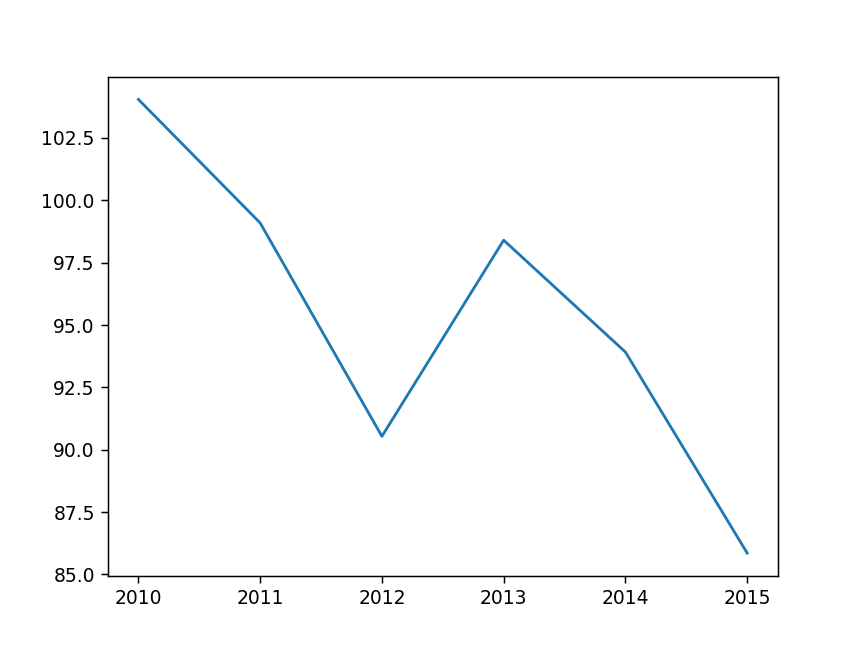

In [77]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(grouped)

<IPython.core.display.Javascript object>


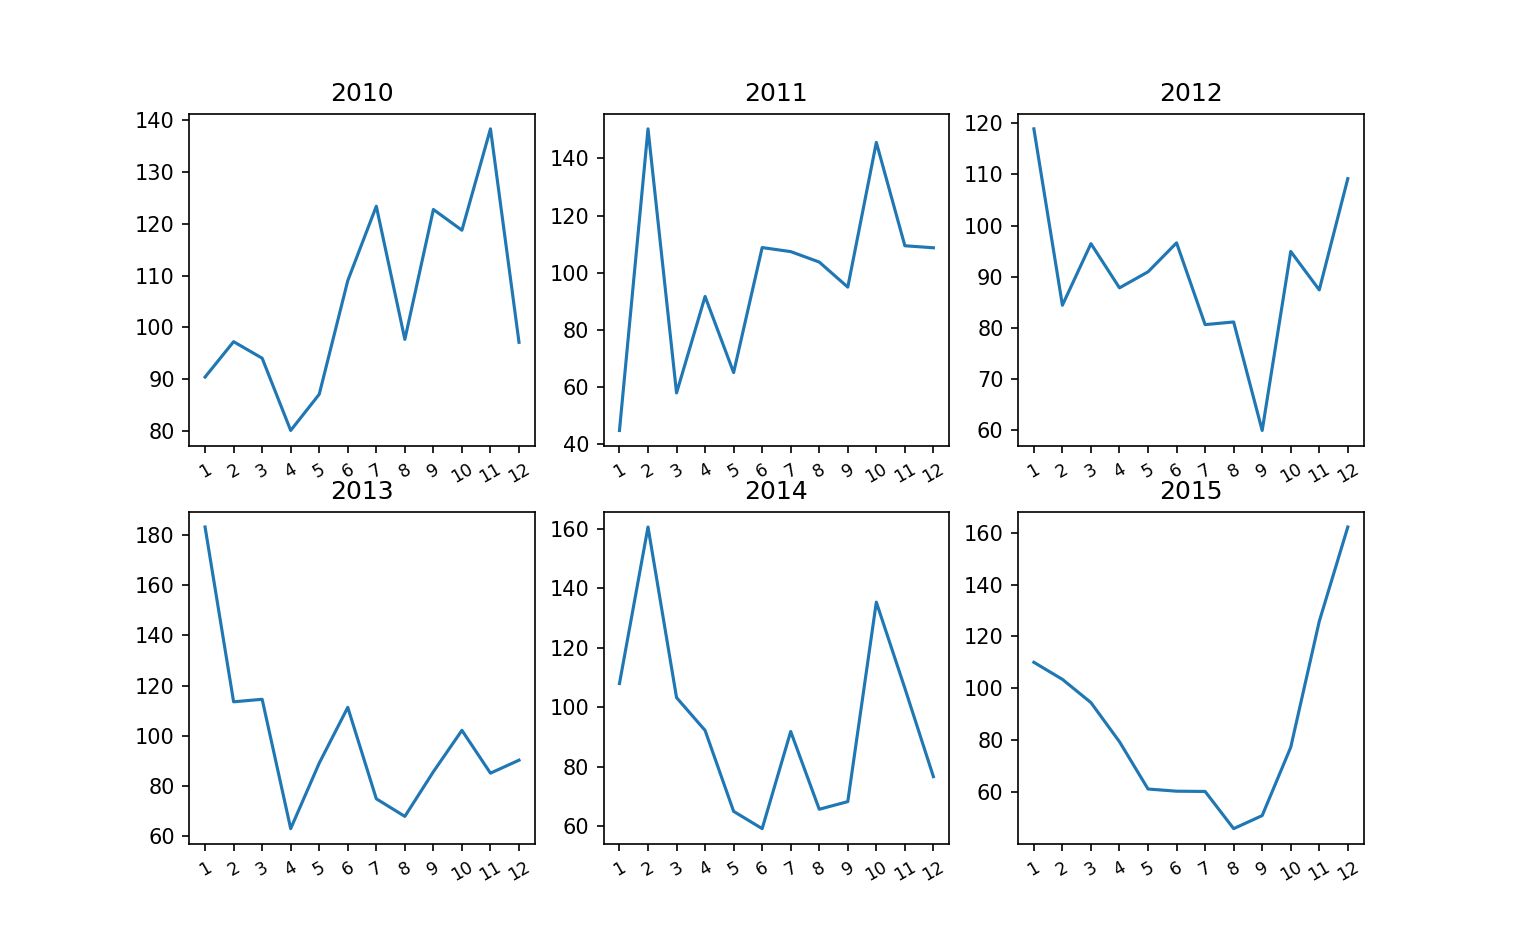

In [76]:
fig = plt.figure()
fig_list = []
for x in range(1, 7):
    ax = fig.add_subplot(2, 3, x)
    fig_list.append(ax)

def monthly(year, data):
    data = data[data['year'] == year]
    monthly_grouped = data['PM_AVG'].groupby(data['month']).mean()
    return monthly_grouped
year = 2010
month_tick = []
for x in range (1, 13):
    month_tick.append(x)
# month_label = filter(str, month_tick)
for x in fig_list:
    x.plot(monthly(year, cln_data))
    x.set_title(str(year))
    x.set_xticks(month_tick)
    x.set_xticklabels(month_tick, rotation = 30, fontsize = 'small')
    
    year += 1
    
# fig.savefig('monthly.pdf', format = 'pdf')



In [85]:
monthly(2015, cln_data)

month
1     110.022737
2     103.445561
3      94.483423
4      79.396991
5      61.167563
6      60.332407
7      60.229503
8      45.896057
9      50.924769
10     77.257841
11    125.803125
12    162.178987
Name: PM_AVG, dtype: float64